In [12]:
import pandas as pd
results_df_path = "runs/detect/train/results.csv"
results_df = pd.read_csv(results_df_path)
results_df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,87.8895,1.39805,2.15048,1.49242,0.60243,0.48547,0.51308,0.30464,1.75294,1.98802,1.78869,0.000555,0.000555,0.000555
1,2,166.1150,1.38457,1.64396,1.47580,0.63227,0.48836,0.54132,0.33527,1.69164,2.10425,1.72636,0.001088,0.001088,0.001088
2,3,240.9770,1.36403,1.51255,1.46080,0.68459,0.51800,0.57218,0.36466,1.74321,1.76384,1.79979,0.001600,0.001600,0.001600
3,4,315.6060,1.34479,1.48898,1.46017,0.71920,0.58393,0.64629,0.43088,1.55276,1.51243,1.63151,0.001568,0.001568,0.001568
4,5,390.8680,1.29171,1.38538,1.42394,0.74760,0.56961,0.64591,0.43759,1.55536,1.49577,1.64710,0.001535,0.001535,0.001535


In [41]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 50 non-null     int64  
 1   time                  50 non-null     float64
 2   train/box_loss        50 non-null     float64
 3   train/cls_loss        50 non-null     float64
 4   train/dfl_loss        50 non-null     float64
 5   metrics/precision(B)  50 non-null     float64
 6   metrics/recall(B)     50 non-null     float64
 7   metrics/mAP50(B)      50 non-null     float64
 8   metrics/mAP50-95(B)   50 non-null     float64
 9   val/box_loss          50 non-null     float64
 10  val/cls_loss          50 non-null     float64
 11  val/dfl_loss          50 non-null     float64
 12  lr/pg0                50 non-null     float64
 13  lr/pg1                50 non-null     float64
 14  lr/pg2                50 non-null     float64
dtypes: float64(14), int64(1)


In [14]:
results_df_columns = results_df.columns
results_df_columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

In [31]:
results_df.describe()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,1920.197030,1.074579,1.032382,1.286229,0.826256,0.690413,0.765861,0.545769,1.299017,1.052757,1.421097,0.000825,0.000825,0.000825
std,14.57738,1090.295893,0.128192,0.267599,0.079296,0.064389,0.071426,0.078938,0.075643,0.166023,0.309316,0.131004,0.000456,0.000456,0.000456
min,1.00000,87.889500,0.916810,0.716270,1.191510,0.602430,0.485470,0.513080,0.304640,1.112690,0.772150,1.284370,0.000050,0.000050,0.000050
25%,13.25000,1005.072250,0.975832,0.869875,1.225178,0.808163,0.675680,0.748752,0.520220,1.177157,0.849618,1.324018,0.000454,0.000454,0.000454
50%,25.50000,1916.525000,1.031640,0.969480,1.260555,0.844760,0.713005,0.791440,0.566235,1.254110,0.945960,1.384815,0.000825,0.000825,0.000825
75%,37.75000,2827.357500,1.141570,1.133285,1.325155,0.871015,0.739605,0.817573,0.598590,1.373792,1.110390,1.470023,0.001197,0.001197,0.001197
max,50.00000,3756.440000,1.398050,2.150480,1.492420,0.892420,0.766230,0.843910,0.625580,1.752940,2.104250,1.799790,0.001600,0.001600,0.001600


In [39]:
def print_column_stats(df, *args, title="Column Statistics"):
    """
    Prints max, min, and average values for specified numeric columns in a neatly formatted table.

    Parameters:
        df (pd.DataFrame): Dataframe containing the data.
        *args (str): Column names for which stats need to be calculated.
        title (str): Title for the printed statistics table. Defaults to "Column Statistics".
    """
    # Filter numeric columns
    numeric_columns = [col for col in args if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

    if not numeric_columns:
        print("No valid numeric columns provided.")
        return

    # Title
    print(f"{title:^60}")
    print("=" * 65)

    # Header
    header = f"{'Column Name':<25}{'Max':<15}{'Min':<15}{'Average':<15}"
    print(header)
    print("=" * 65)

    # Calculate and print stats
    for col in numeric_columns:
        max_val = df[col].max()
        min_val = df[col].min()
        avg_val = df[col].mean()
        print(f"{col:<25}{max_val:<15.7f}{min_val:<15.7f}{avg_val:<15.7f}")

    print("=" * 65)


print_column_stats(results_df, 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)','metrics/mAP50-95(B)', title="YOLOv5 Training Metrics")

                  YOLOv5 Training Metrics                   
Column Name              Max            Min            Average        
metrics/precision(B)     0.8924200      0.6024300      0.8262556      
metrics/recall(B)        0.7662300      0.4854700      0.6904126      
metrics/mAP50(B)         0.8439100      0.5130800      0.7658612      
metrics/mAP50-95(B)      0.6255800      0.3046400      0.5457692      


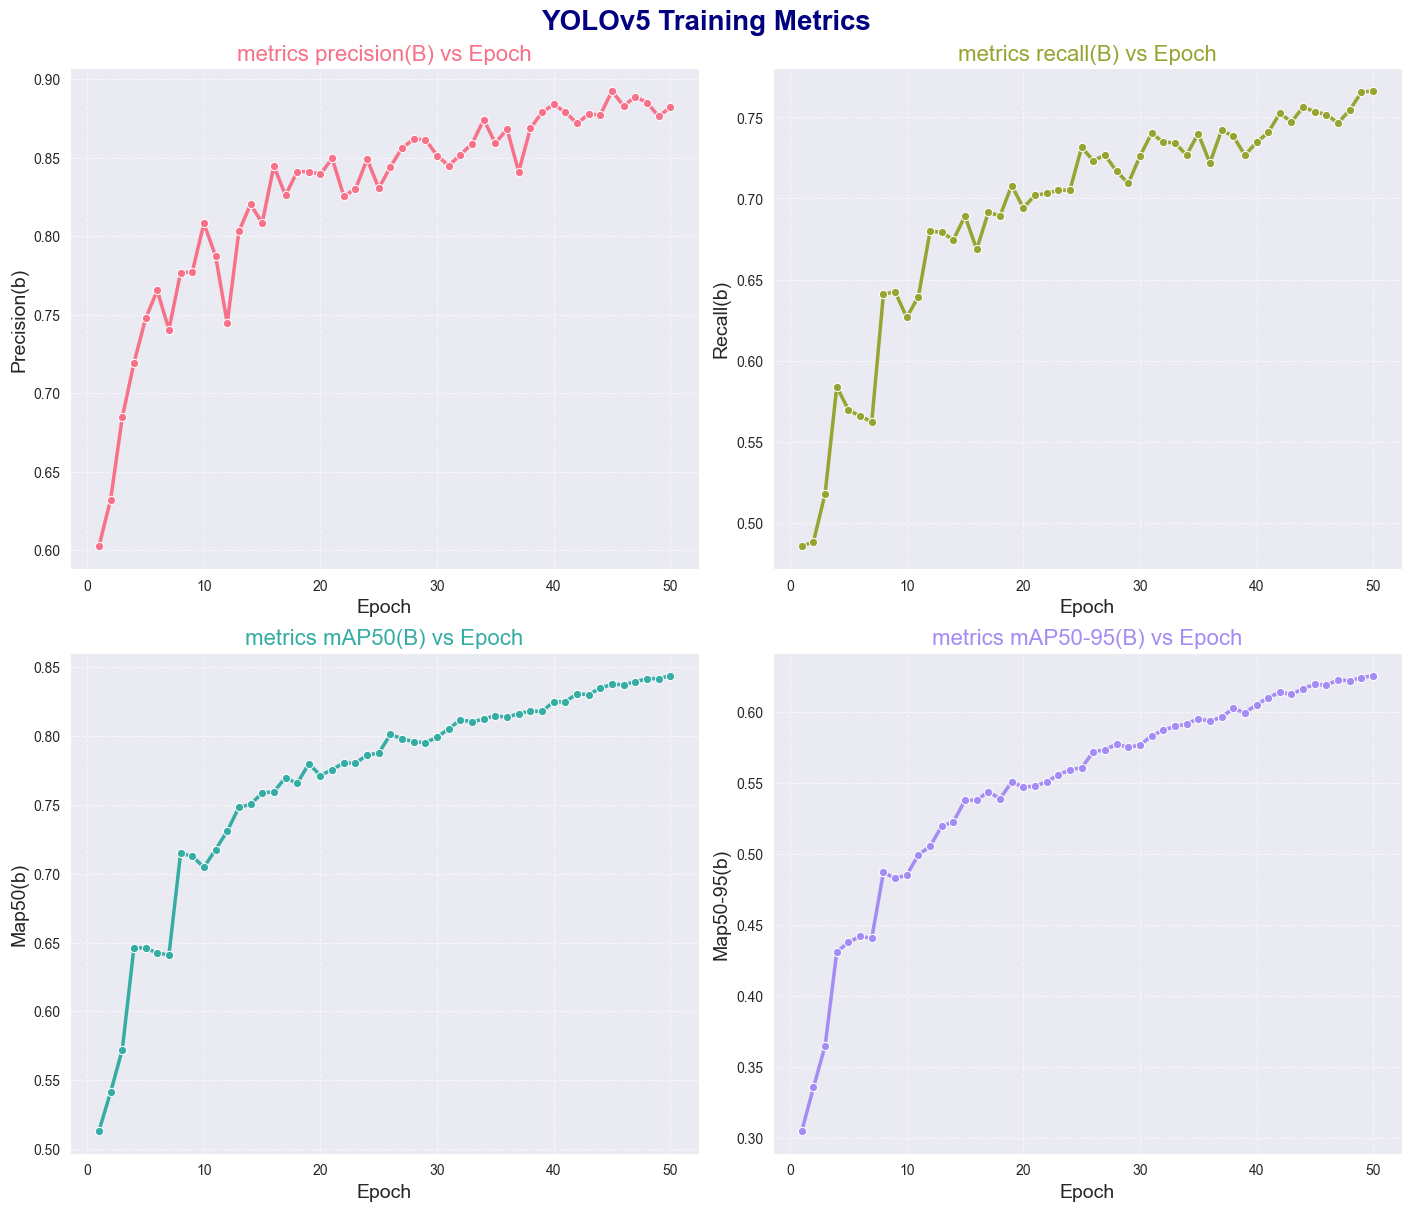

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics(df: pd.DataFrame, title: str ,*args):
    """
    Plots specified metrics from a YOLOv5 results dataframe in a grid layout with enhanced styling.

    Parameters:
        df (pd.DataFrame): Dataframe containing YOLOv5 results with columns like 'epoch', 'precision', 'recall', etc.
        *args (str): Metrics to plot, e.g., 'precision', 'recall', 'map50', etc.
    """
    # Validate requested metrics
    valid_metrics = set(df.columns) - {'epoch'}  # Exclude 'epoch'
    requested_metrics = [metric for metric in args if metric in valid_metrics]

    if not requested_metrics:
        print(f"No valid metrics to plot. Available metrics are: {valid_metrics}")
        return

    # Limit the number of metrics to 6 for better readability
    if len(requested_metrics) > 6:
        print("Maximum 6 metrics can be plotted at a time. Using the first 6 provided.")
        requested_metrics = requested_metrics[:6]

    # Setup grid for plots
    num_metrics = len(requested_metrics)
    cols = 2  # Number of columns in the grid
    rows = (num_metrics + cols - 1) // cols  # Compute number of rows needed

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows), constrained_layout=True)
    axes = axes.flatten()  # Flatten to easily iterate
    sns.set_style("darkgrid")
    palette = sns.color_palette("husl", n_colors=num_metrics)

    # Plot each metric
    for i, metric in enumerate(requested_metrics):
        sns.lineplot(data=df, x='epoch', y=metric, ax=axes[i], color=palette[i], linewidth=2.5, marker='o')
        axes[i].set_title(f'{metric.replace("/", " ")} vs Epoch', fontsize=16, color=palette[i])
        axes[i].set_xlabel('Epoch', fontsize=14)
        axes[i].set_ylabel(metric.split('/')[-1].capitalize(), fontsize=14)
        axes[i].grid(True, linestyle='--', alpha=0.6)

    # Remove unused subplots if metrics < grid size
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add a common title
    fig.suptitle(f"{title}", fontsize=20, weight='bold', color='navy')
    plt.show()


plot_metrics(
    results_df,
    "YOLOv5 Training Metrics",
    "metrics/precision(B)",
    "metrics/recall(B)",
    "metrics/mAP50(B)",
    "metrics/mAP50-95(B)",
)


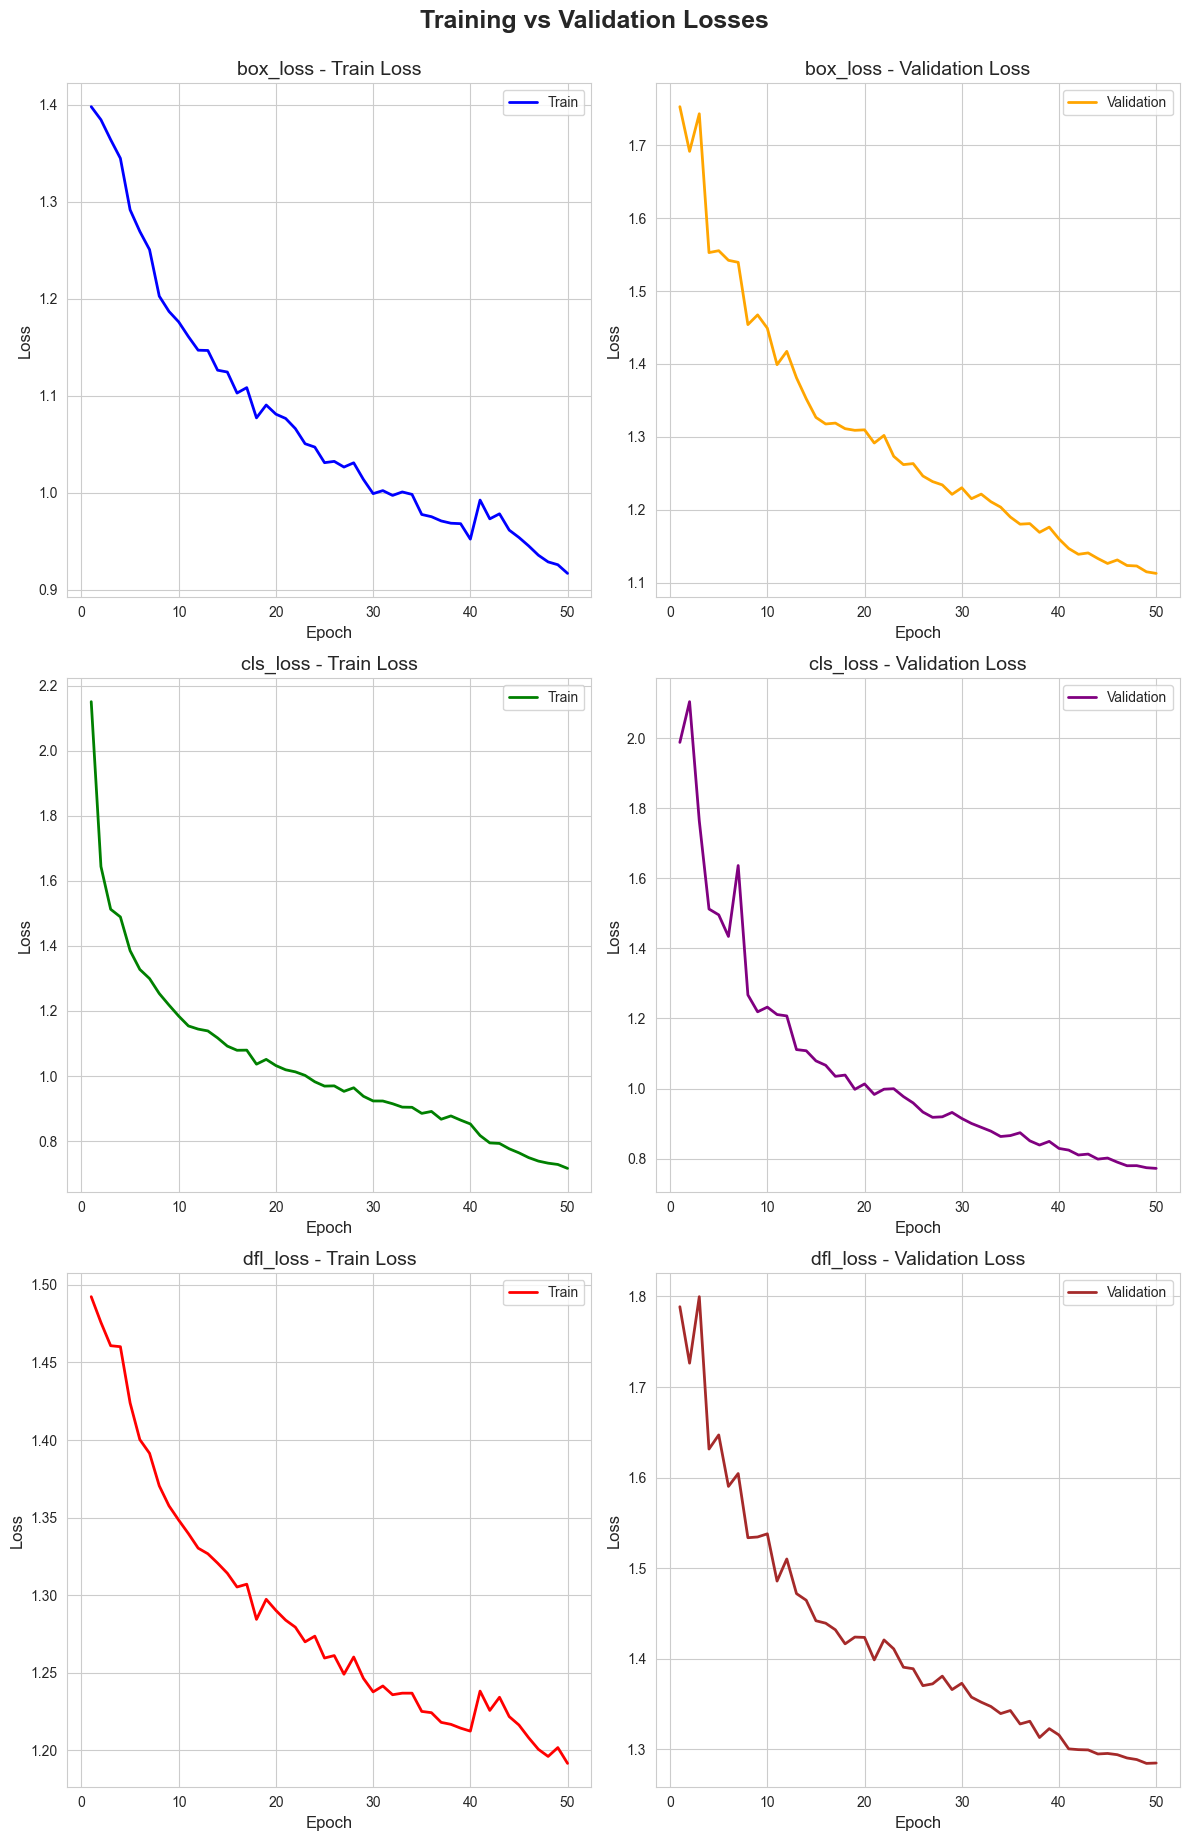

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_train_val_losses(df: pd.DataFrame) -> None:
    """
    Plots 'train/box_loss' vs 'val/box_loss', 'train/cls_loss' vs 'val/cls_loss',
    'train/dfl_loss' vs 'val/dfl_loss' in a 2x3 grid, where each loss type is plotted in two separate columns.
    Each plot in a row will have different colors for distinction.

    Parameters:
        df (pd.DataFrame): DataFrame containing the training and validation losses
                           with columns like 'train/box_loss', 'val/box_loss', etc.
    """
    # Define the losses to plot
    train_losses = ['train/box_loss', 'train/cls_loss', 'train/dfl_loss']
    val_losses = ['val/box_loss', 'val/cls_loss', 'val/dfl_loss']

    # Check if the required columns exist in the DataFrame
    for loss in train_losses + val_losses:
        if loss not in df.columns:
            raise ValueError(f"Column '{loss}' not found in the DataFrame.")

    # Setup grid for plots (3 rows x 2 columns)
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 rows and 2 columns

    # Define a set of colors to be used for each plot
    train_colors = ['blue', 'green', 'red']
    val_colors = ['orange', 'purple', 'brown']

    # Plot train and validation losses side by side for each type of loss
    for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
        row = i  # Row index
        # Plotting for the train loss in the first column with a unique color per row
        sns.lineplot(data=df, x='epoch', y=train_loss, ax=axes[row, 0], label='Train', color=train_colors[i], linewidth=2)
        axes[row, 0].set_title(f'{train_loss.split("/")[1]} - Train Loss', fontsize=14)
        axes[row, 0].set_xlabel('Epoch', fontsize=12)
        axes[row, 0].set_ylabel('Loss', fontsize=12)
        axes[row, 0].legend(fontsize=10)
        axes[row, 0].grid(True)

        # Plotting for the validation loss in the second column with a unique color per row
        sns.lineplot(data=df, x='epoch', y=val_loss, ax=axes[row, 1], label='Validation', color=val_colors[i], linewidth=2)
        axes[row, 1].set_title(f'{val_loss.split("/")[1]} - Validation Loss', fontsize=14)
        axes[row, 1].set_xlabel('Epoch', fontsize=12)
        axes[row, 1].set_ylabel('Loss', fontsize=12)
        axes[row, 1].legend(fontsize=10)
        axes[row, 1].grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Training vs Validation Losses', fontsize=18, weight='bold', y=1.02)
    plt.show()

# Example usage:
# Assuming `results_df` contains columns like 'epoch', 'train/box_loss', 'val/box_loss', etc.
plot_train_val_losses(results_df)


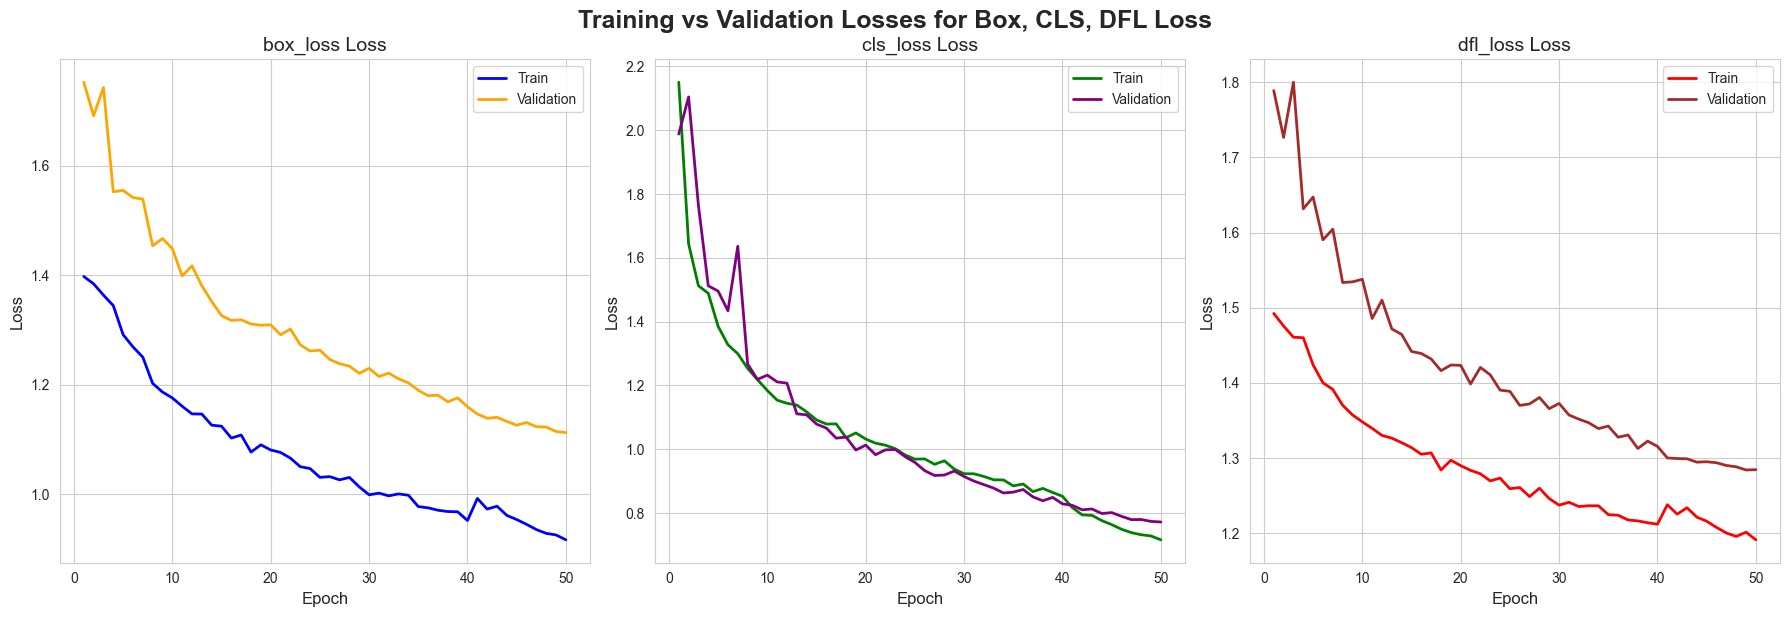

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_train_val_losses(df):
    """
    Plots 'train/box_loss', 'train/cls_loss', 'train/dfl_loss' vs 
    'val/box_loss', 'val/cls_loss', 'val/dfl_loss' in a 1x3 grid, 
    with separate colors for each type of loss and legends.

    Parameters:
        df (pd.DataFrame): DataFrame containing the training and validation losses
                           with columns like 'train/box_loss', 'val/box_loss', etc.
    """
    # Define the losses to plot
    train_losses = ['train/box_loss', 'train/cls_loss', 'train/dfl_loss']
    val_losses = ['val/box_loss', 'val/cls_loss', 'val/dfl_loss']
    
    # Check if the required columns exist in the DataFrame
    for loss in train_losses + val_losses:
        if loss not in df.columns:
            raise ValueError(f"Column '{loss}' not found in the DataFrame.")

    # Setup grid for plots (1 row and 3 columns)
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row and 3 columns

    # Define a set of colors to be used for each plot
    train_colors = ['blue', 'green', 'red']
    val_colors = ['orange', 'purple', 'brown']

    # Plot train and validation losses side by side for each type of loss
    for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
        ax = axes[i]  # Select the axis for the current loss type

        # Plotting for the train loss
        sns.lineplot(data=df, x='epoch', y=train_loss, ax=ax, label='Train', color=train_colors[i], linewidth=2)
        
        # Plotting for the validation loss
        sns.lineplot(data=df, x='epoch', y=val_loss, ax=ax, label='Validation', color=val_colors[i], linewidth=2)

        # Customize the subplot
        ax.set_title(f'{train_loss.split("/")[1]} Loss', fontsize=14)
        ax.set_xlabel('Epoch', fontsize=12)
        ax.set_ylabel('Loss', fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Training vs Validation Losses for Box, CLS, DFL Loss', fontsize=18, weight='bold', y=1.02)
    plt.show()

# Example usage:
# Assuming `results_df` contains columns like 'epoch', 'train/box_loss', 'val/box_loss', etc.
plot_train_val_losses(results_df)
